#  Data Loading and Understanding

In [155]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

loan = pd.read_csv("loan.csv", sep=",",encoding = "ISO-8859-1",low_memory = False)
# Information about dataset
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [156]:
# get number of rows and columns in the dataset

print("Shape of the dataset : ", loan.shape,"\n")
print("Columns of the dataset : ")
loan.columns

Shape of the dataset :  (39717, 111) 

Columns of the dataset : 


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [157]:
# get columns with null values
null_columns = loan.columns[loan.isnull().any()]

print("Columns containing NA values : \n" , null_columns,"\n\n")

# get percentage of null values
null_count = (loan[null_columns].isnull().sum()/len(loan.index))*100

print("Percentage of null values in each columns : \n",null_count)

Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_12

In [158]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)
loan_df = loan.drop(missing_columns, axis=1)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [159]:
print("Column details after removing null values")
print("=============================================")
print("Shape of the dataset : ",loan_df.shape)
# get columns with null values
null_columns = loan_df.columns[loan_df.isnull().any()]
print("Columns containing NA values : \n" , null_columns,"\n\n")

# get percentage of null values
null_count = (loan_df[null_columns].isnull().sum()/len(loan_df.index))*100
print("Percentage of null values in each columns : \n",null_count)

Column details after removing null values
Shape of the dataset :  (39717, 55)
Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object') 


Percentage of null values in each columns : 
 emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64


### Inference:
*   We could see there are 39717 rows and 111 columns in the given dataset.
*   Out of 111 columns, there are lots of columns having only NA values which will be no use for analysis.
*   We have removed the columns with NA values more than 90%.




In [160]:
# seeing the dataset after dropping the columns having more than 90% missing values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [161]:
# checking categorical variables and see for useful info
unique_columns = loan_df.columns[loan_df.nunique(dropna=False) < 10]

for i in range(0,len(unique_columns)):
  print("Column: ",unique_columns[i],"having unique values: ",loan_df[unique_columns[i]].unique())


Column:  term having unique values:  [' 36 months' ' 60 months']
Column:  grade having unique values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Column:  home_ownership having unique values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
Column:  verification_status having unique values:  ['Verified' 'Source Verified' 'Not Verified']
Column:  loan_status having unique values:  ['Fully Paid' 'Charged Off' 'Current']
Column:  pymnt_plan having unique values:  ['n']
Column:  inq_last_6mths having unique values:  [1 5 2 0 3 4 6 7 8]
Column:  pub_rec having unique values:  [0 1 2 3 4]
Column:  initial_list_status having unique values:  ['f']
Column:  collections_12_mths_ex_med having unique values:  [ 0. nan]
Column:  policy_code having unique values:  [1]
Column:  application_type having unique values:  ['INDIVIDUAL']
Column:  acc_now_delinq having unique values:  [0]
Column:  chargeoff_within_12_mths having unique values:  [ 0. nan]
Column:  delinq_amnt having unique values:  [0]
Column:  pub_rec_bankrupt

In [162]:
#Drop columns having only one categorical value
drop_cols = [c for c in list(loan_df) if loan_df[c].nunique() <= 1]
#print(drop_cols)
loan_df = loan_df.drop(columns=drop_cols)

## Dropping Customer behaviour variables based on the guidance given during query resolution session
These values will not be available at the point of decision making hence not relevant

In [163]:
behaviour_var =  ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
loan_df = loan_df.drop(behaviour_var, axis=1)
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')

In [164]:
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
desc                      32.58
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
mths_since_last_delinq    64.66
pub_rec_bankruptcies       1.75
dtype: float64

In [165]:
# seeing data for desc and mths_since_last_delinq columns which has 32.6% and 64.7% missin values respectively
loan_df.loc[:,['desc','mths_since_last_delinq']]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


*   desc and mths_since_last_delinq column can be removed from analysis since it is not having relevant information.
*   Removing some customer variables which are not used for analysis.



In [166]:
#Removing irrelevant columns
loan_df = loan_df.drop(columns=['id','member_id','desc','emp_title','url','title','zip_code','mths_since_last_delinq'],axis=1)

In [167]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

### Drop rows with loan status as 'Current'

Since we are only concerned about the loans that were defaulted and the ones that were paid in full , we can ignore the existing loans.
So Drop all rows where the status is 'Current'


In [168]:
#Removing rows which has loan_status as current
loan_df.drop(loan_df[(loan_df['loan_status'] == 'Current')].index, inplace=True)

In [169]:
#Seeing number of rows and columns after clean up
loan_df.shape

(38577, 18)

After dropping the irrelavant columns and rows, finally our dataset has 38577 rows and 18 columns for analysis.

## Null value treatment

In [170]:
#seeing missing values for all the coulmns
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.81
dtype: float64

#### Variable : emp_length

In [171]:
#seeing the values present in the emp_length column
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [172]:
#fill null values as 99
loan_df['emp_length'].fillna(99,inplace=True)

### Variable : pub_rec_bankruptcies

In [173]:
#seeing values present in the column
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [174]:
# fill null values with -1 
loan_df['pub_rec_bankruptcies'].fillna(-1,inplace=True)

In [175]:
# checking whether some rows have more than 5 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)

0

### Manipulating data types of columns and values where necessary

In [176]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [177]:
#converting to int by removing years from emp_length
loan_df.emp_length = loan_df['emp_length'].apply(lambda x: re.split(r'(\d+)',str(x))[1]).astype('int64')

In [178]:
#Removing months from term column and converting to int
loan_df['term'] = loan_df['term'].str.replace(r'months','').astype('int64')

In [179]:
#converting to float : Interest Rate
loan_df.int_rate = loan_df.int_rate.str.strip('%.').astype('float').round(2)

In [180]:
#Rounding float
loan_df.funded_amnt_inv=round(loan_df.funded_amnt_inv, 2)

In [181]:
# Coverting Dates to date time format 
loan_df.issue_d=pd.to_datetime(loan_df.issue_d, format='%b-%y', errors='ignore')

In [182]:
# extracting month and year from issue_date
loan_df['issue_month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [183]:
#Dropped issue_d column
loan_df.drop(['issue_d'], axis=1, inplace=True)

In [184]:
# Funded to income ratio 
loan_df['funded_to_income']=(loan_df['funded_amnt']*100/loan_df['annual_inc']).astype(int)

In [185]:
#Converting loan_status to integer type
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1).astype(int)

loan_df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### Creating bins for numeric columns

In [186]:
# Installments Bins
loan_df['installment_bins'] = pd.cut(x=loan_df['installment']/100, bins=[0,2,4,6,35], 
                    labels=['Low','Medium','High','Very High'])

In [187]:
# Funded to income Bins
loan_df['funded_to_income_bins'] = pd.cut(x=loan_df['funded_to_income'], bins=[0,10,20,30,40,50,60,70,80,90,100], 
                    labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80K-90K','90K-100K']) 

In [188]:
# Interest rate Bins
loan_df['int_rate_bins'] = pd.cut(x=loan_df['int_rate'], bins=[5,10,15,20,25], 
                    labels=['5%-10%','10%-15%','15%-20%','20%-25%']) 

In [189]:
# Funded Amount INV Bins
loan_df['funded_amnt_inv_bins'] = pd.cut(x=loan_df['funded_amnt_inv']/1000, bins=[0,5,10,15,20,25,30,35], 
                    labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']) 

In [190]:
# DTI only 5 Bins
loan_df['dti_bins'] = pd.cut(x=loan_df['dti'], bins=[0,10,20,30], 
                    labels=['Low','Medium','High']) 

In [191]:
# Annual Income Bins
loan_df['annual_inc_bins'] = pd.cut(x=loan_df['annual_inc']/1000, bins=[0,50,100,150,60000], 
                    labels=['Low','Medium','High','Very High']) 

In [192]:
#Funded amount bin
loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(y)+'-'+str(y+5)+'k' for y in range (0, 35, 5)])

# Data Analysis

## Reusable functions

In [193]:
#Show labels in bar plots - copied from https://stackoverflow.com/a/48372659
def showLabels(ax, d):
    #plt.margins(0.1, 0.1)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks()  
    counts = {}
    if type(d) is not float:
        for key, value in d.items():
            counts[str(key)] = value
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if type(d) is float:
            label = '{}'.format(str(round(y_value*100/d,2)) + "%")
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
    return ax

In [194]:
def count_plot(df,col):
    total = float(len(df))
    df.sort_values(by=col,inplace=True)
    plt.figure(figsize=(10, 4))
    ax=sns.countplot(x=col, data=df,palette=sns.color_palette('pastel', 16))
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return showLabels(ax,total)

def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().sort_values().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax,float(len(df)))
    plt.tight_layout()


def plot_charged_off(dataframe,plotby):
    charged_off=dataframe.loc[(dataframe.loan_status== 1)].groupby([plotby]).loan_status.count()
    #print(charged_off)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = charged_off * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.sort_values().plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('Charged Off % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()


# Univariate Analysis

### Target Column : loan_status

AxesSubplot(0.0884375,0.148286;0.896563x0.814214)


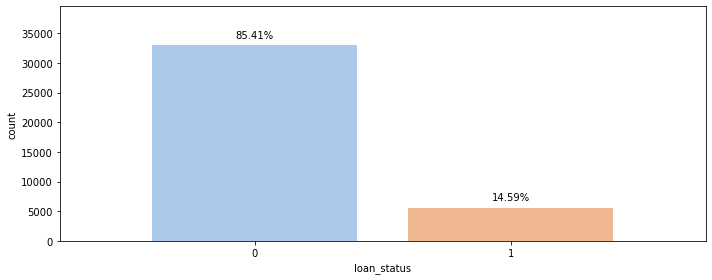

In [195]:
print(count_plot(loan_df,'loan_status'))

#### Observation

As we can see , 85% of the loans are successfully paid and only 15% of the loans are defaulted

### Variable "Funded amount" / "Loan amount" / Funded amount inv"


*   For our analysis we will consider the funded amount instead of the loan amount ,as that is the amount that has been repaid (total_rec_prncp) by those customers who have successfully paid off the loan



C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


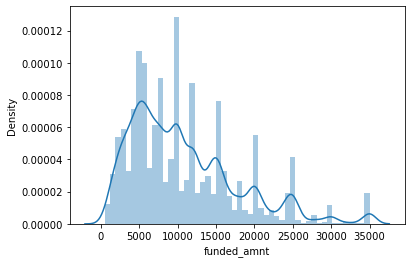

In [196]:
sns.distplot(loan_df['funded_amnt'])
plt.show()

<AxesSubplot:xlabel='funded_amnt', ylabel='loan_status_str'>

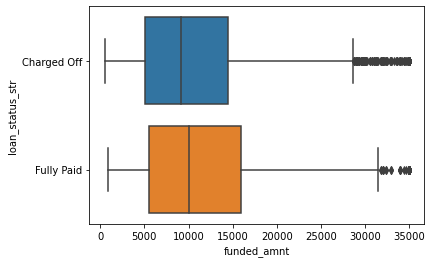

In [197]:
loan_df['loan_status_str'] = loan_df['loan_status'].apply(lambda x: 'Fully Paid' if x == 1 else "Charged Off").astype(str)

sns.boxplot(x=loan_df['funded_amnt'], y = loan_df['loan_status_str'], data=loan_df)

In [198]:
loan_df.funded_amnt.describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [199]:
loan_df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,10618.520486,6956.047888,500.0,5050.0,9200.0,14500.0,35000.0
1,5627.0,11753.398792,7760.516335,900.0,5575.0,10000.0,16000.0,35000.0


### Observation:

*   Overall, the applied funded amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
*   Funding amounts see a spike around each 5000 boundary. 
*   Charged off loans have higher average of funded amount than the paid off loans.


AxesSubplot(0.0884375,0.148286;0.896563x0.814214)


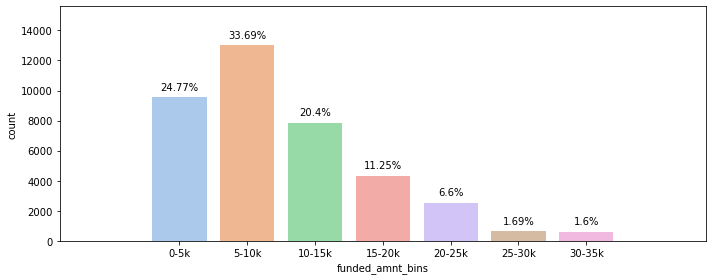

In [200]:
print(count_plot(loan_df,'funded_amnt_bins'))

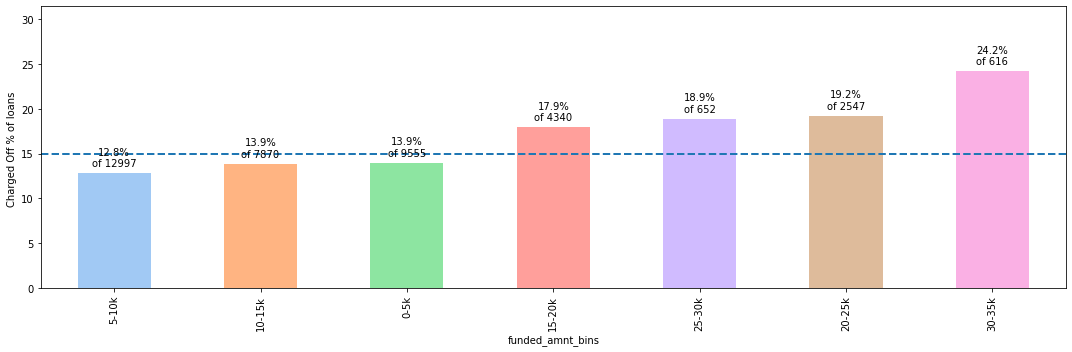

In [201]:
plot_charged_off(loan_df,'funded_amnt_bins')

### Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

### Continuing univariate analysis for other categorical columns

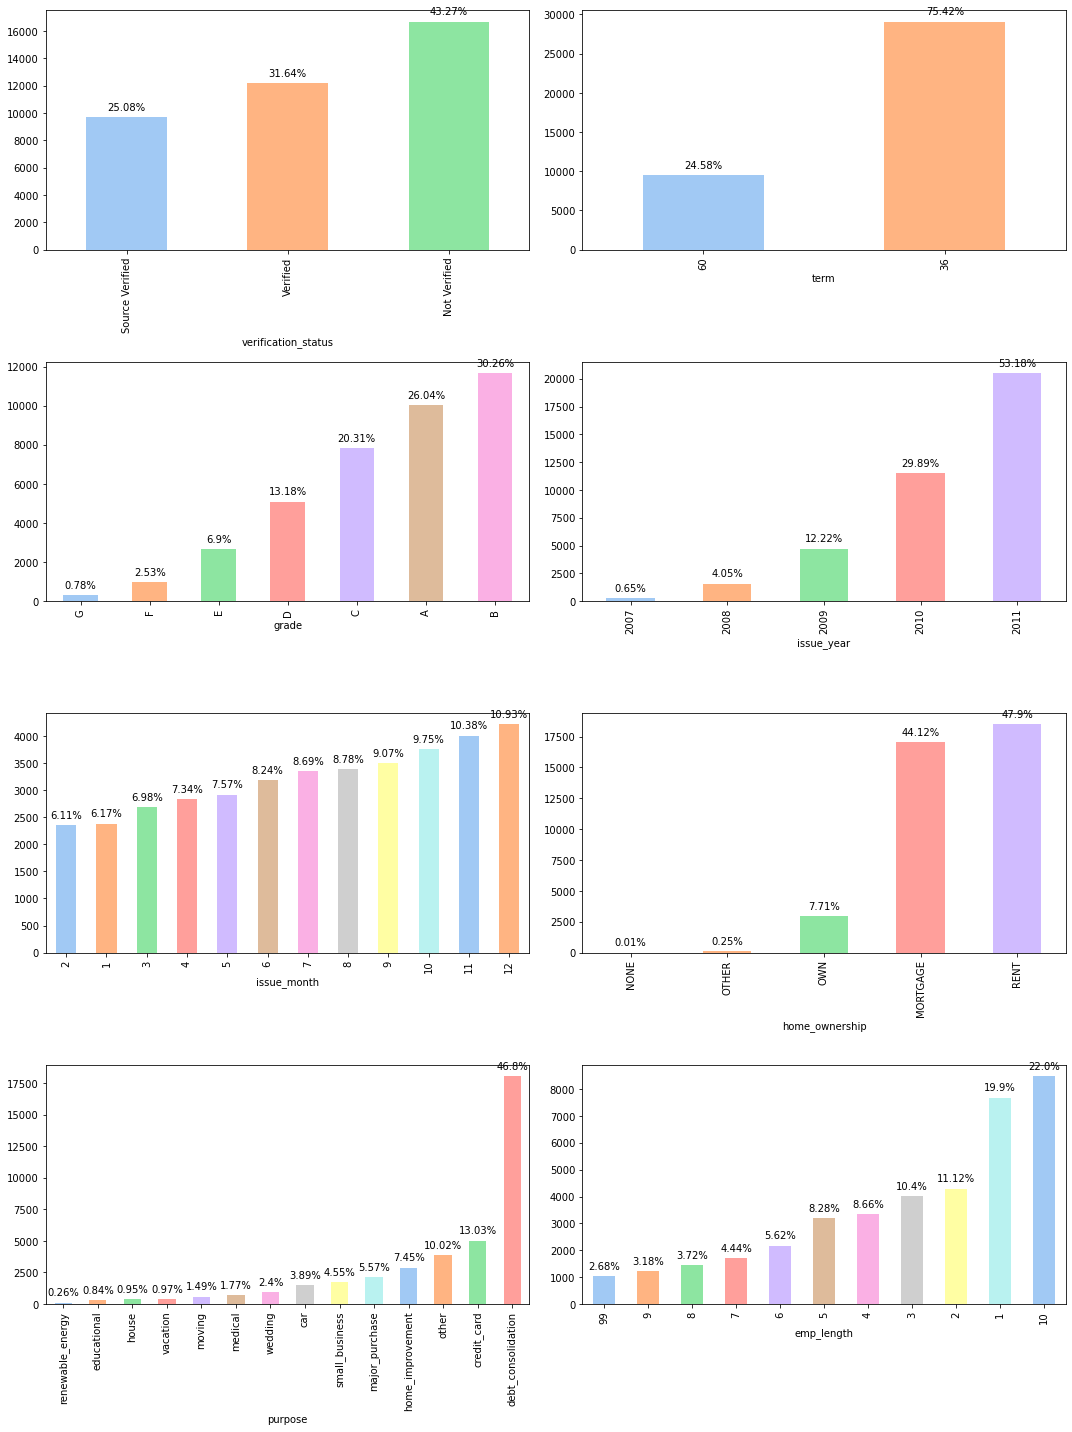

In [202]:
category_columns_list=['verification_status','term','grade','issue_year','issue_month','home_ownership','purpose','emp_length']
plt.figure(figsize=(15,20))
categoricalBarPlots(loan_df, category_columns_list)

### Inference:
*   term
    * There are 2 terms - 36 months and 60 months in the entire dataset.
    * ~75% of loans have 36 months term and ~25% have 60 months term.
*   verification_status
    * There are 3 categories - Verified, not verified and source verified
    * ~43% are not verified.
*   purpose
    * Debt_consolidation and credit card comprises more than 50% of loan.
*   emp_length
    * Employee with less than or equal to one year and more than 9 year experience are likely to apply for loans.
*   home ownership
    * People living in rental and having mortgages are more likely to apply for loan.
*   grade
    * Grade with A, B and C comprises more than 70% of the loan.
*   issue_month
    * Steady increase in month on month loan request as a year progresses. 
*   issue_year
    * Substantial increase in loan as the year on year.






### Converted numeric columns as categorical columns and did analysis

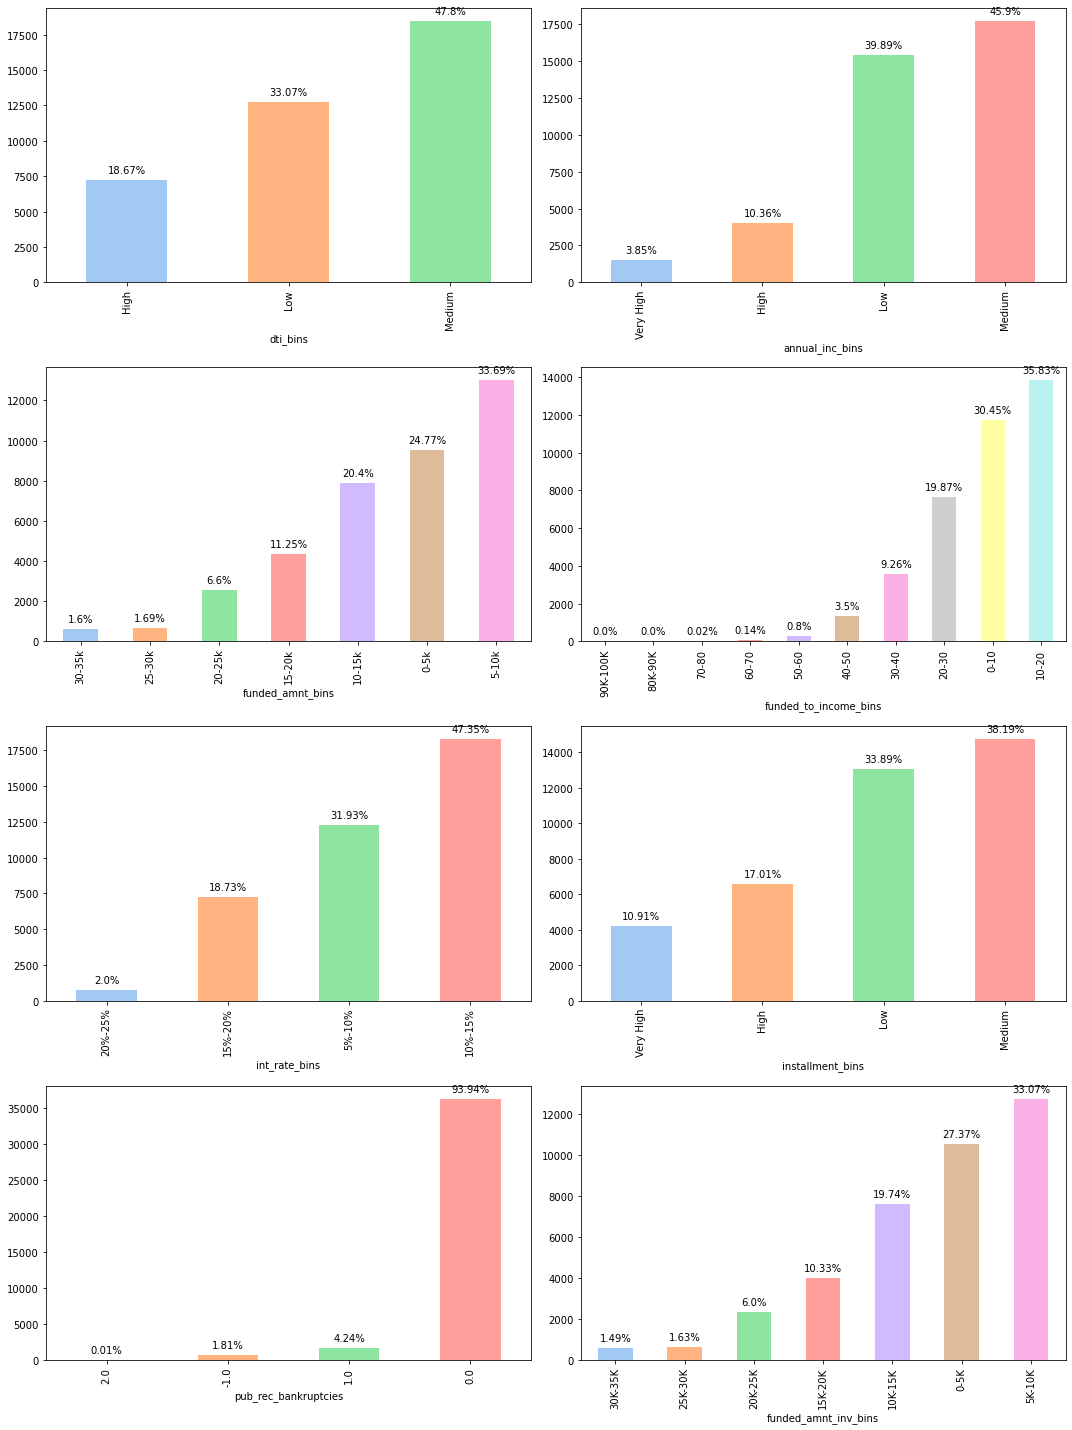

In [203]:
plt.figure(figsize=(15,20))
categoricalBarPlots(loan_df, ['dti_bins','annual_inc_bins','funded_amnt_bins','funded_to_income_bins','int_rate_bins','installment_bins','pub_rec_bankruptcies','funded_amnt_inv_bins'])

### Inference:
*   dti
    * Normal distribution observed.
*   annual_inc
    * People with annual income less than 100k are more likely to apply for loan.
*   funded_amnt
    * More than 70% funnded amnt is less than 15k.
*   funded_to_income
    * More than 70% of loan funded amnt will be 30% of the annual income of requestor.
*   int_rate
    * 70% 0f the requestors likely to choose 5% to 15% interest rate.
*   installment
    * Almost 90% of the loans have installment less than 600.
*   funded_amnt_inv
    * More than 70% funnded amnt by investors is less than 15k.
*   pub_rec_bankruptcies
    * Almost 94% of the requestors are not having public records of bankruptices.








# Segmented Univariate Analysis

#### Default rate

In [204]:
round(loan_df.loc[loan_df.loan_status == 1].loan_status.count()/ len(loan_df) * 100 , 2)

14.59

**Charged off to total loans ratio = 14.59 % , Setting average default line as 15% based on the same**
Any variable with percentage of default higher than 15% should be considered a business risk.

Considering above default rate, we are visualizing the categorical columns to identify the risk parameters with higher than default percent.

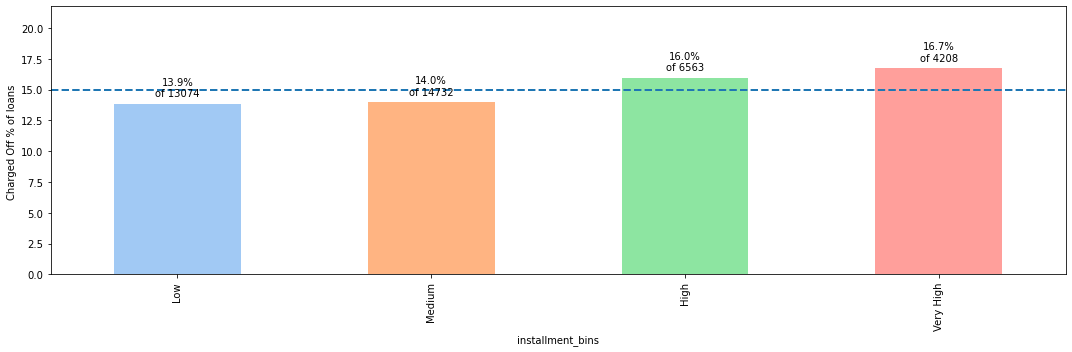

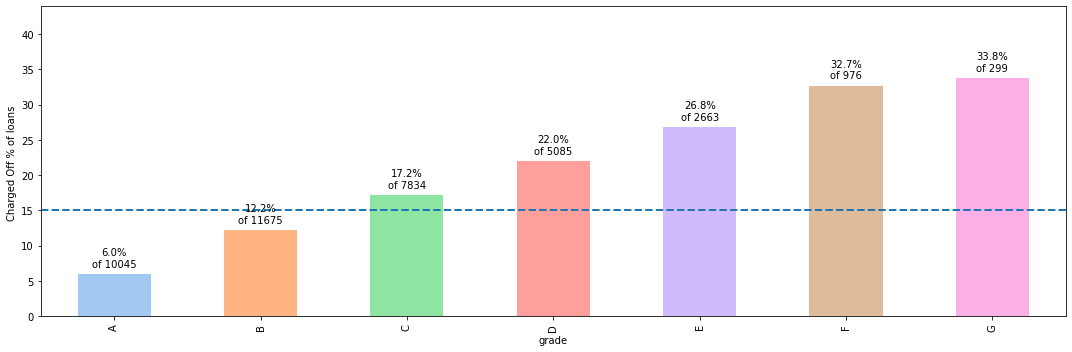

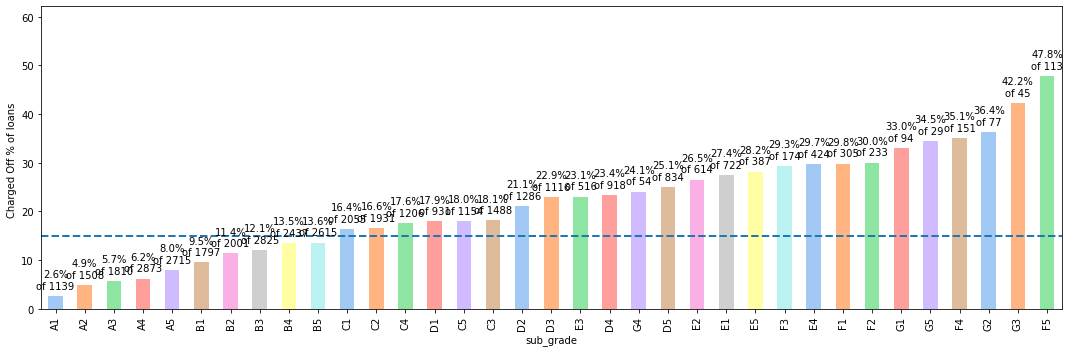

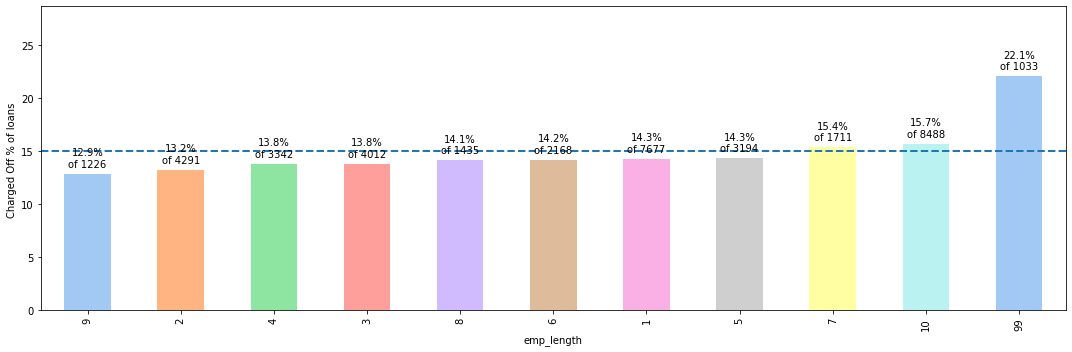

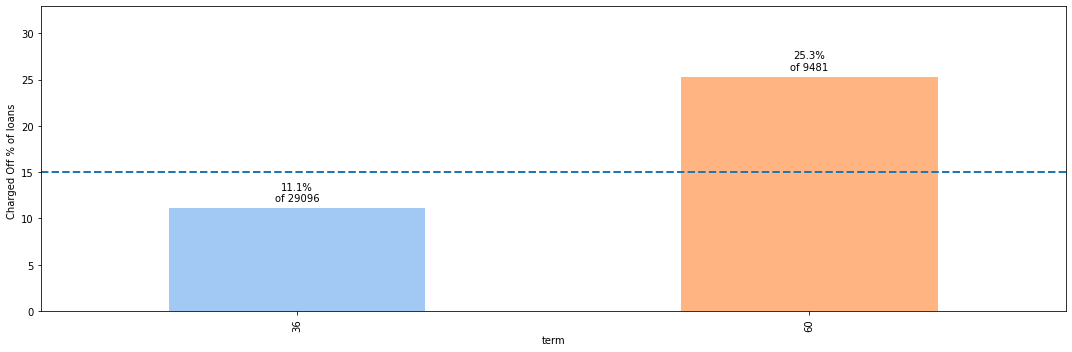

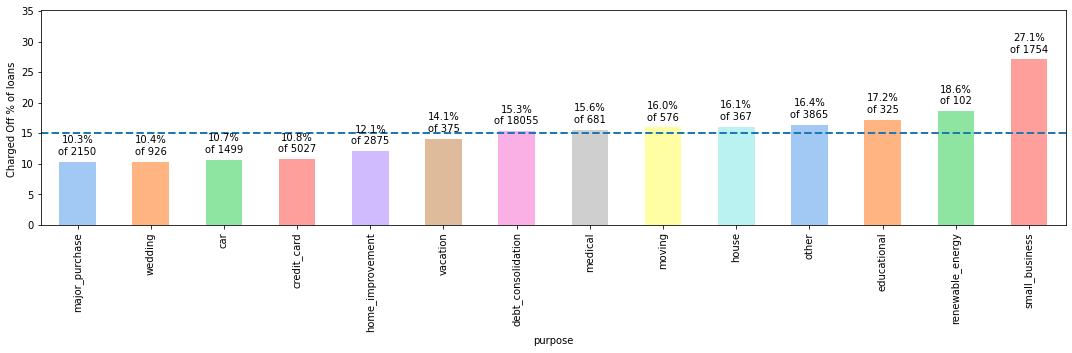

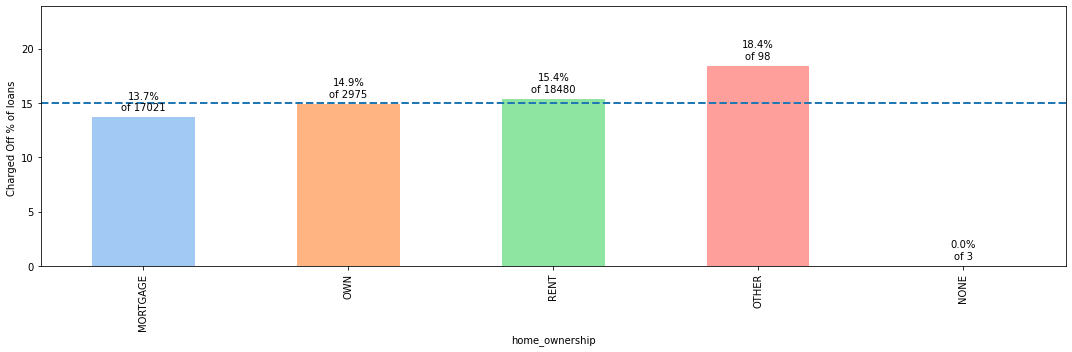

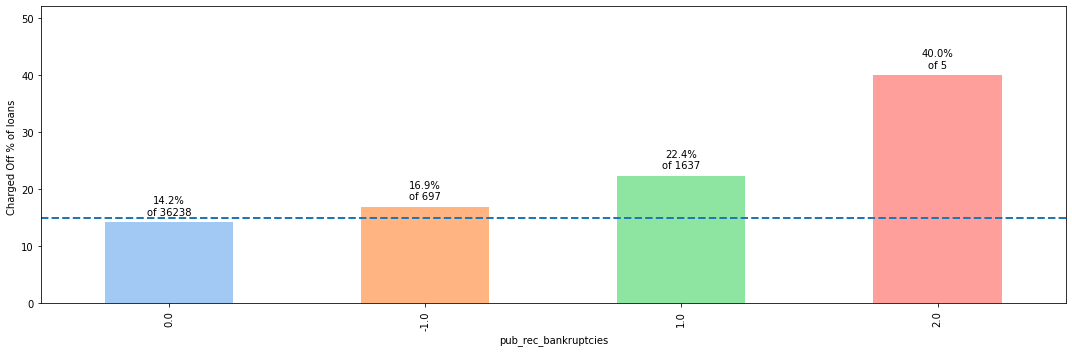

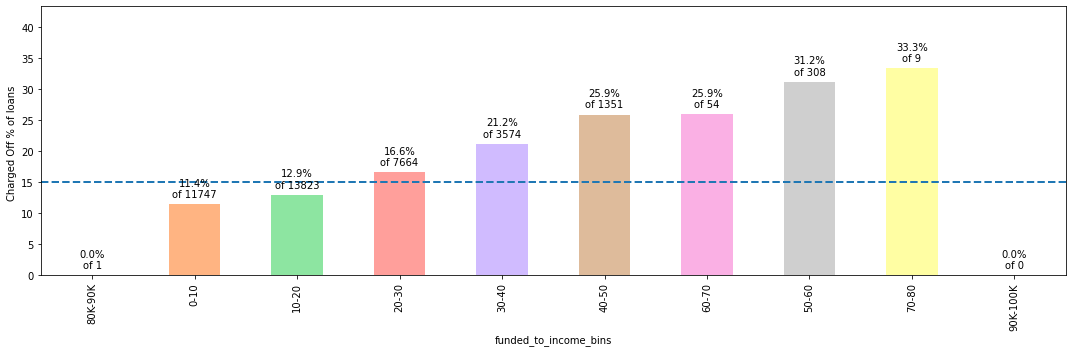

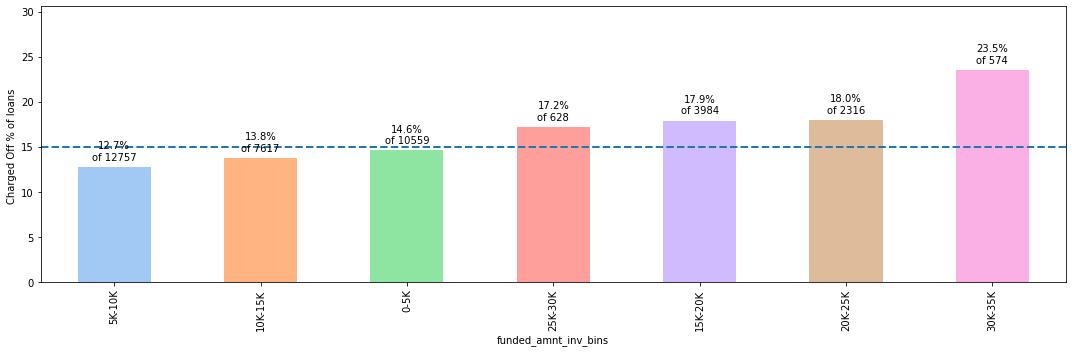

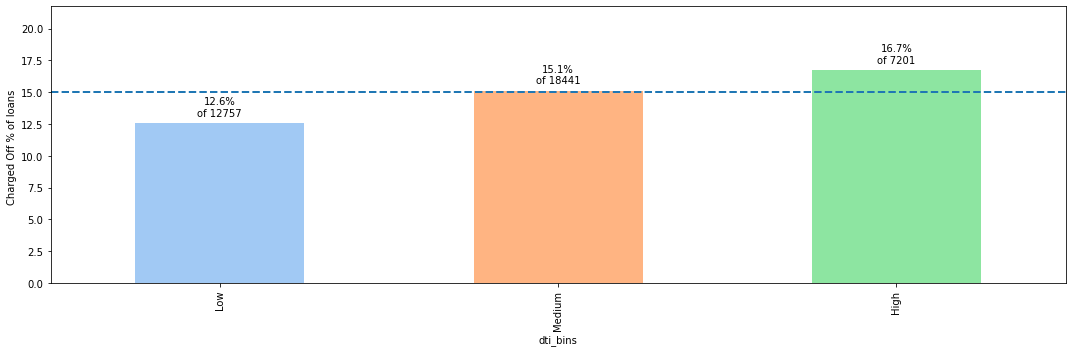

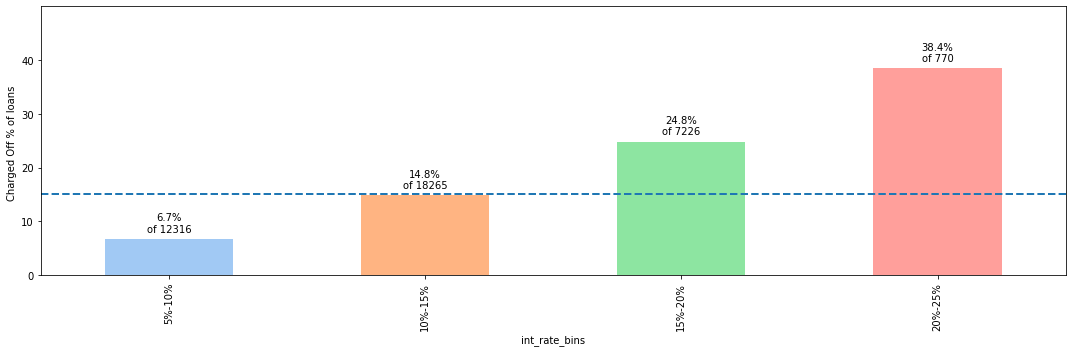

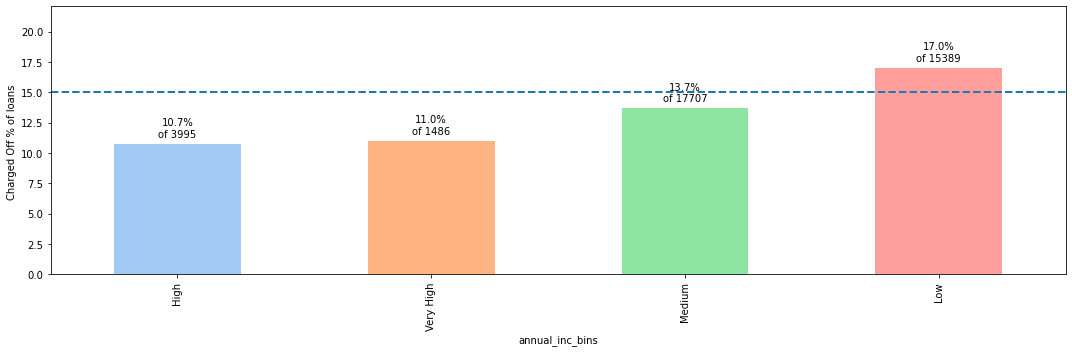

In [205]:
col_names = ['installment_bins','grade','sub_grade','emp_length','term','purpose','home_ownership','pub_rec_bankruptcies','funded_to_income_bins','funded_amnt_inv_bins','dti_bins','int_rate_bins','annual_inc_bins']

rows = len(col_names)

for idx,col in enumerate(col_names,start=1):
  plot_charged_off(loan_df, col)
plt.tight_layout()

### Inference
*   installement
    * Higher the installment rate, higher the default rate.
*   grade
    * As grade increases, risk factor is increasing at almost 5% per grade from A to F. There is high probability of defailt from grade C to grade G.
* sub grade:
    * There is a linear increase. F5 have almost 50% defaulters and G3 have 42% defaulters and claerly standing out.
*   emp_length
    * There are no right correlation between emp_length and risk factor. 0 is imputed for null values. 
*   term
    * Loans with 60 month term are likely to be defaulted.
*   purpose
    * debt_consolidation,educational,house,medical,moving,other,renewable_energy and small_business are the purposes which are likely to be defaulted. People availing loan for small business have 30% probability of default. 
*   home_ownership
    * Other and rented are above the threshold.
*   pub_rec_bankruptcies
    * There are high chances of default with existing bankruptices record. People with 2 bankruptices record are having 40% probability of default.
*   funded_to_income
    * As the funded_to_income ratio increases, the risk of default increases. The ratio above 20% is above the threshold for defaluters.
*   funded_amnt_inv
    * Funded amount invested above 15k are likely to be defaulted.
*   dti
    * The dti values within 15 to 27 are above the threshold.
*   interest rate
    * Higher the interest rate, higher the chance of default. Default percent increases exponentially as the interest rate increases. Interest rate above 15% are above threashold and likely to be defaulted.
*   annual income
    * People with annual income less than 50k and between 500k-1000k are above threshold.




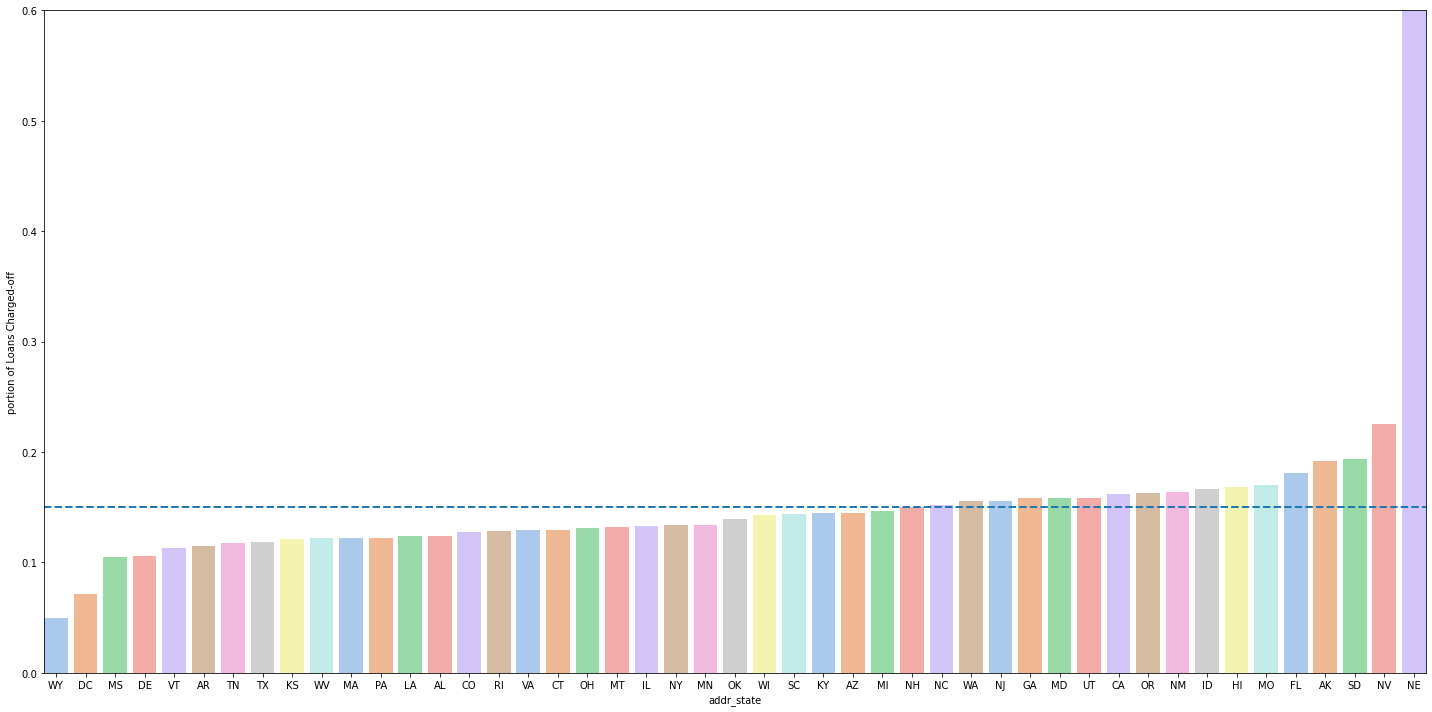

In [206]:
plt.figure(figsize=(20,10))
charge_off_count = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

ax=sns.barplot(x=charge_off_count.index, y=charge_off_count.values,palette=sns.color_palette('pastel', 16))
ax.set_ylabel('portion of Loans Charged-off')
ax.axhline(y=0.15, xmin=0, xmax=1,linestyle='--', lw=2)
plt.margins(0, 0)
plt.tight_layout()

plt.show()


In [207]:
loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False).head(18)


addr_state
NE    0.600000
NV    0.225470
SD    0.193548
AK    0.192308
FL    0.181230
MO    0.170149
HI    0.168675
ID    0.166667
NM    0.163934
OR    0.163218
CA    0.161894
UT    0.158730
MD    0.158358
GA    0.158205
NJ    0.155307
WA    0.155257
NC    0.152000
NH    0.150602
Name: loan_status, dtype: float64

### Inference
The above mentioned state are above the threashold value. In which NE having slight risk of default.

------------------------------------------------


COLUMN :  int_rate


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

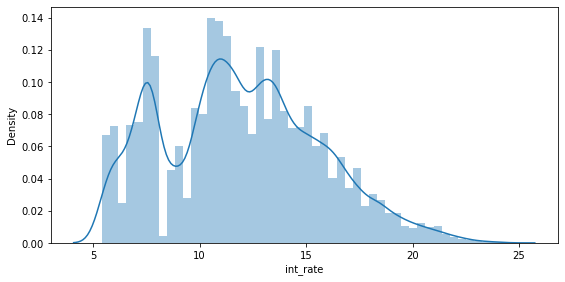

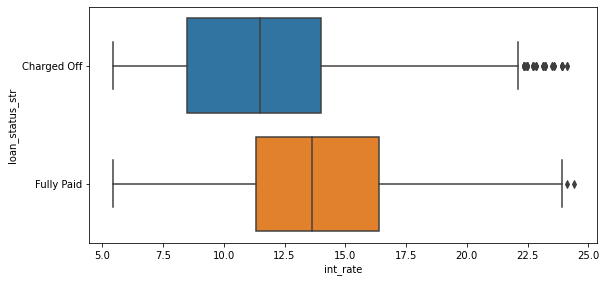

                   count       mean       std   min    25%    50%    75%  \
loan_status_str                                                            
Charged Off      32950.0  11.609761  3.599964  5.42   8.49  11.49  13.99   
Fully Paid        5627.0  13.820432  3.654413  5.42  11.31  13.61  16.40   

                   max  
loan_status_str         
Charged Off      24.11  
Fully Paid       24.40  
------------------------------------------------


COLUMN :  installment


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


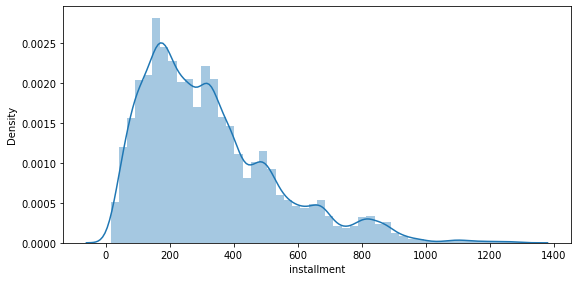

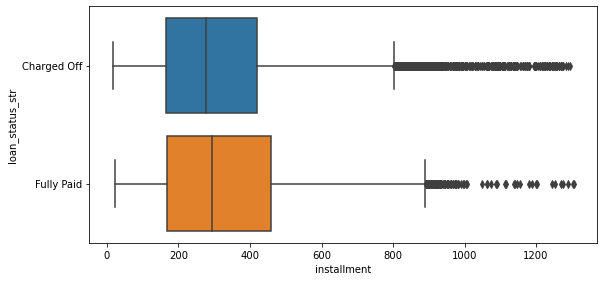

                   count        mean         std    min       25%     50%  \
loan_status_str                                                             
Charged Off      32950.0  320.125232  207.081110  15.69  165.2825  275.65   
Fully Paid        5627.0  336.175006  217.051841  22.79  168.5550  293.87   

                     75%      max  
loan_status_str                    
Charged Off      420.735  1295.21  
Fully Paid       457.840  1305.19  
------------------------------------------------


COLUMN :  annual_inc


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


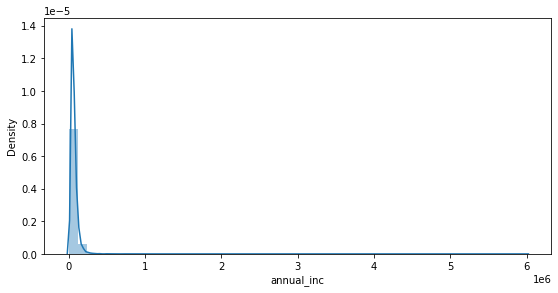

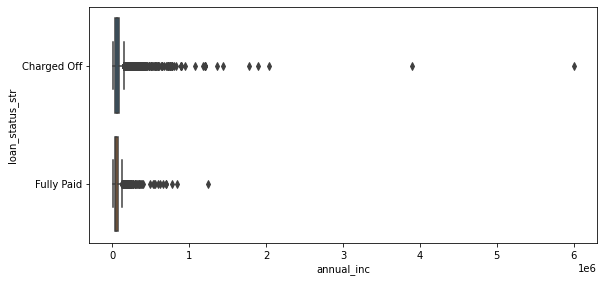

                   count          mean           std     min       25%  \
loan_status_str                                                          
Charged Off      32950.0  69862.503328  66562.246521  4000.0  41132.75   
Fully Paid        5627.0  62427.298034  47776.014188  4080.0  37000.00   

                     50%      75%        max  
loan_status_str                               
Charged Off      60000.0  84000.0  6000000.0  
Fully Paid       53000.0  75000.0  1250000.0  
------------------------------------------------


COLUMN :  dti


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


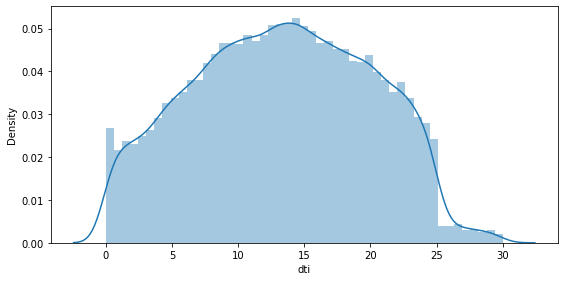

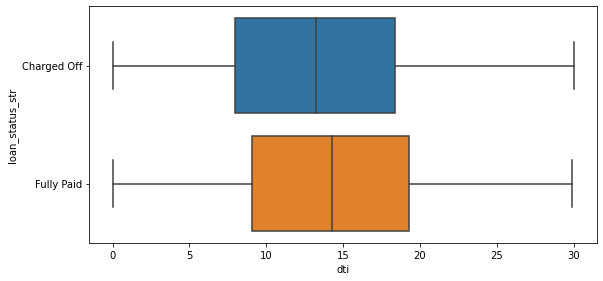

                   count       mean       std  min   25%    50%    75%    max
loan_status_str                                                              
Charged Off      32950.0  13.148421  6.680041  0.0  7.98  13.20  18.39  29.99
Fully Paid        5627.0  14.000624  6.585577  0.0  9.05  14.29  19.29  29.85


<Figure size 432x288 with 0 Axes>

In [208]:
continous_columns = ['int_rate','installment','annual_inc','dti']

rows = len(continous_columns)
plt.figure(figsize=(20,20))
for idx,col in enumerate(continous_columns,start=1):
    print("------------------------------------------------\n\n")
    print("COLUMN : ", col)
    plt.figure(figsize=(20,20))
    plt.subplot(rows, 2, idx)
    ax = sns.distplot(loan_df[col])
    plt.show()
    plt.figure(figsize=(20,20))
    plt.subplot(rows, 2, idx+1)
    bx = sns.boxplot(x=loan_df[col], y = loan_df['loan_status_str'], data=loan_df)
    plt.show()
    print(loan_df.groupby('loan_status_str')[col].describe())
plt.tight_layout()

Calculating default rates for categorical variables

In [209]:
def diff_rate(cat_var):
    default_rates = loan_df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    sub = default_rates[0] - default_rates[-1]
    return (round(default_rates, 2),sub)

In [210]:
loan_df.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                        int64
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                  int64
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                 int32
purpose                    object
addr_state                 object
dti                       float64
pub_rec_bankruptcies      float64
issue_month                 int64
issue_year                  int64
funded_to_income            int32
installment_bins         category
funded_to_income_bins    category
int_rate_bins            category
funded_amnt_inv_bins     category
dti_bins                 category
annual_inc_bins          category
funded_amnt_bins         category
loan_status_str            object
dtype: object

In [211]:
dic = {key: diff_rate(key)[1]*100 for key in loan_df.select_dtypes(['object','category']).columns if key != 'loan_status' and key != 'loan_status_str' and key != 'funded_to_income_bins'}
for i in dic:
  print("{}\t{}".format(i,round(dic[i],2)))

grade	27.79
sub_grade	45.15
home_ownership	18.37
verification_status	3.97
purpose	16.76
addr_state	60.0
installment_bins	2.86
int_rate_bins	31.7
funded_amnt_inv_bins	10.77
dti_bins	4.18
annual_inc_bins	6.24
funded_amnt_bins	11.39


From the above, we can see the increase in percent for each bin against the default rate. For example, there is a 10% increase in default rate as you go from high to low annual funded_amnt_inv. 

# Bivariate analysis

#### Creating Data_frame with Defaulters for Bi-Variate analysis

In [212]:
#Function for bivariate plots
def bivariate_loan_df(xval,yval,sort=False):    
    plt.figure(figsize=(20, 5))
    if sort==True:
        ax=sns.barplot(x=xval,y=yval,data=loan_df,palette=sns.color_palette('pastel', 16) ,  order=sorted(loan_df[xval].unique()))
    else:
        ax=sns.barplot(x=xval,y=yval,data=loan_df,palette=sns.color_palette('pastel', 16) )
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    plt.show()

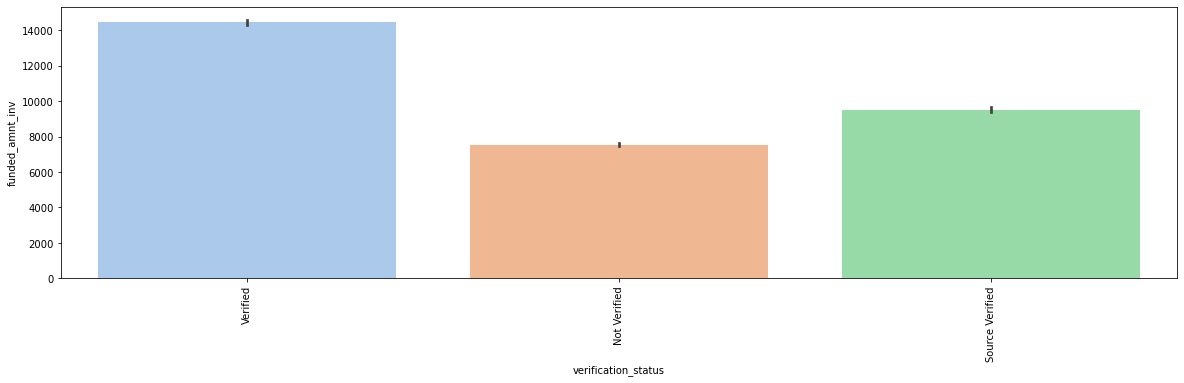

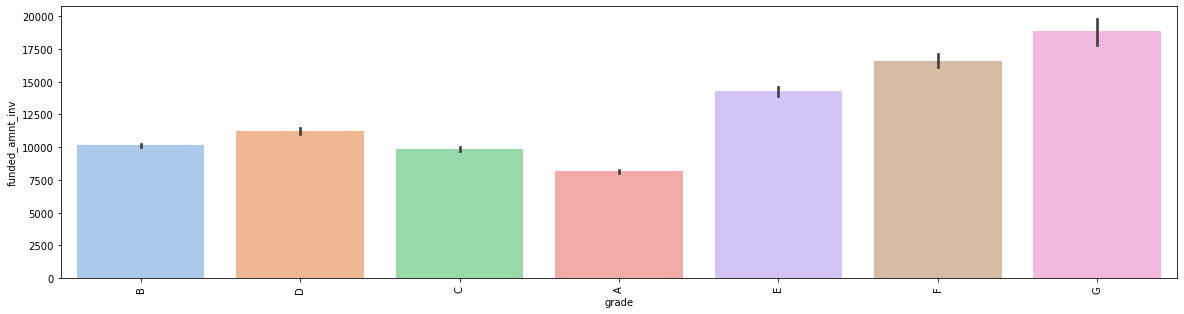

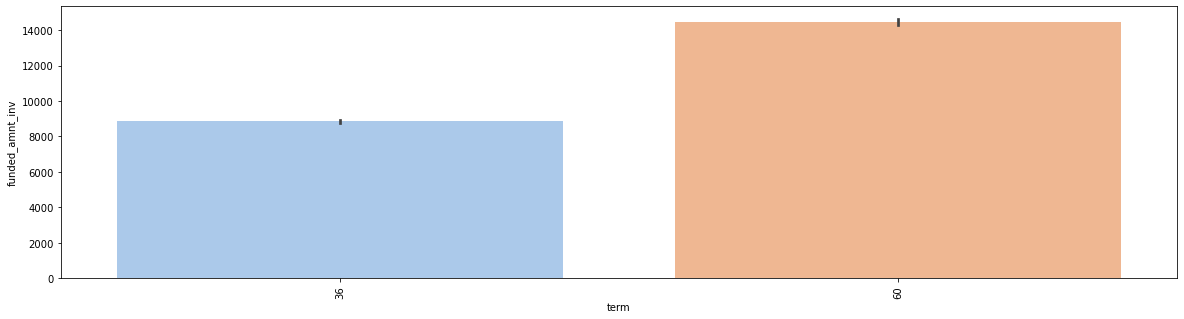

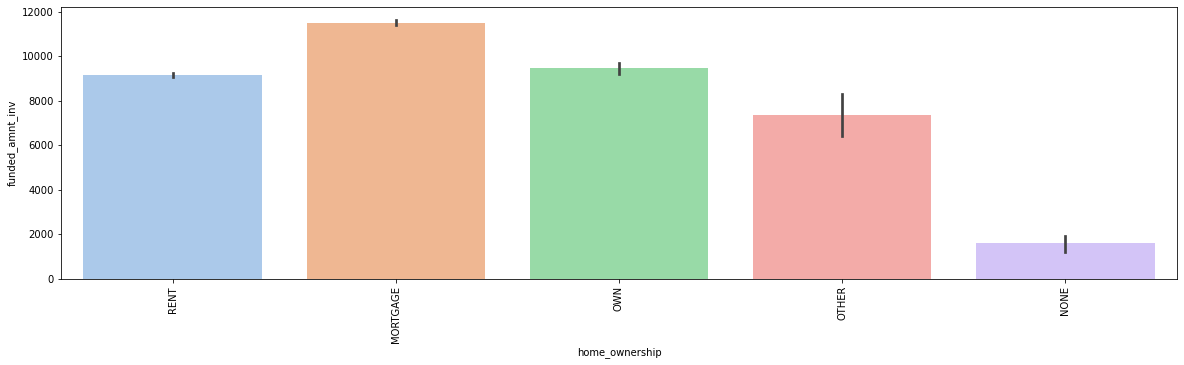

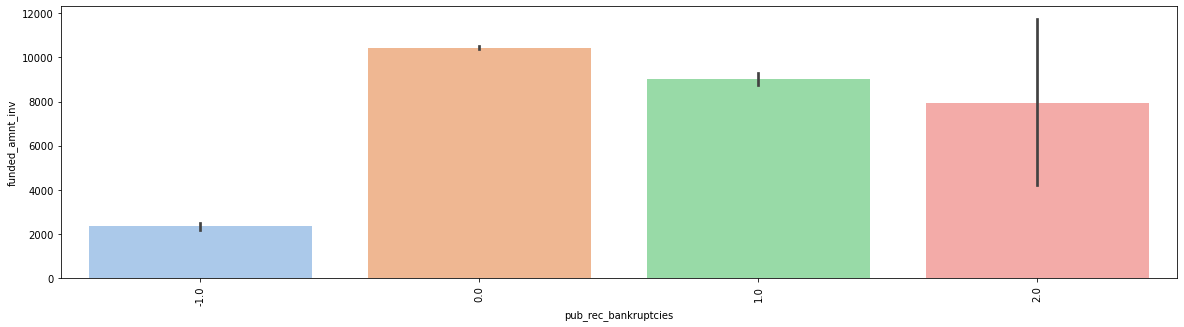

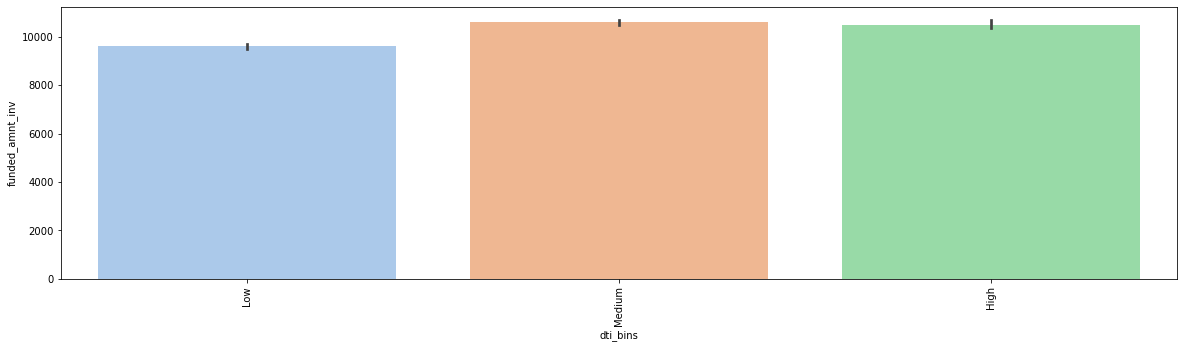

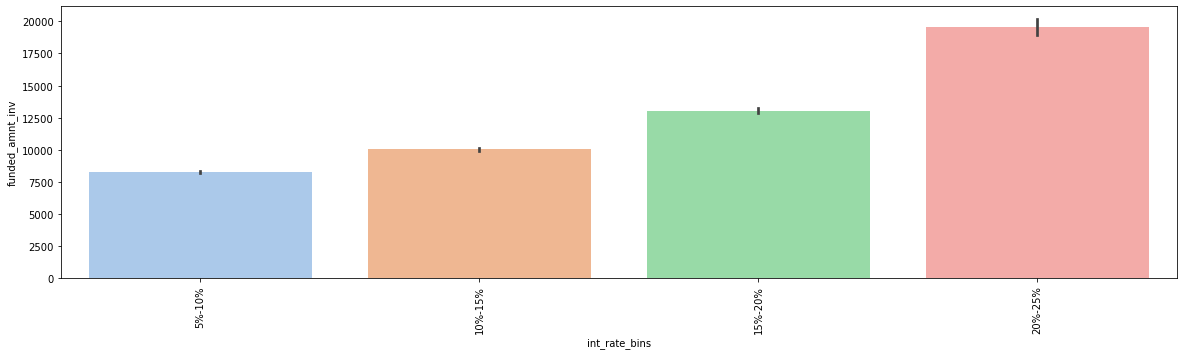

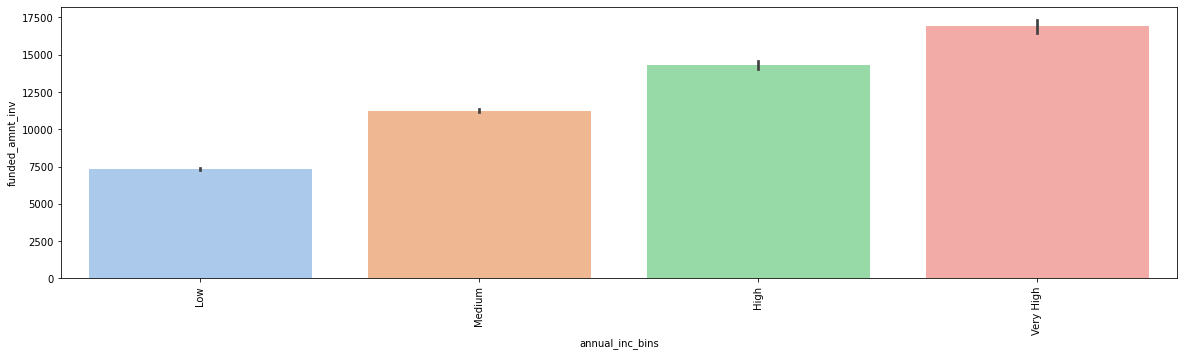

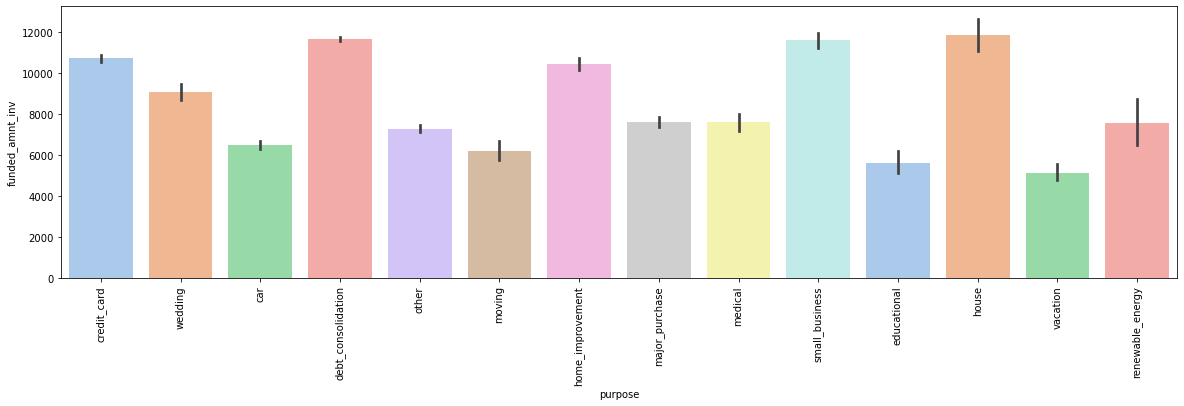

<Figure size 432x288 with 0 Axes>

In [213]:
col_names = ['verification_status','grade','term','home_ownership','pub_rec_bankruptcies','dti_bins','int_rate_bins','annual_inc_bins','purpose']

rows = len(col_names)
for idx,col in enumerate(col_names,start=1):
  bivariate_loan_df(col,'funded_amnt_inv',False)
plt.tight_layout()

### Inference:
categorical variables vs funded_amnt_inv
* verification status
    * Verifi
*   grade
    * There is positive correlation between grade and funded_amnt_inv.
*   term
    * funded_amnt_inv is high for 60 months term.
*   home_ownership
    * Mortgage and own are getting higher funded_amnt_inv
*   pub_rec_bankruptices
    * Even though there are public record bankruptices, investors are lending money to requestors.
*   dti
    * Investors are lending money for low and medium dti.
*   interest rate
    * As funded_amnt_inv increases, interest rate increases.
*   annual income
    * As annual income increases, funded amount by investors increases.


# Segmented Bivariate Analysis

In [214]:
#Dataframe for defaulters
risk_loan_df=loan_df.loc[(loan_df.loan_status==1),:]
risk_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 38694 to 5742
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   loan_amnt              5627 non-null   int64   
 1   funded_amnt            5627 non-null   int64   
 2   funded_amnt_inv        5627 non-null   float64 
 3   term                   5627 non-null   int64   
 4   int_rate               5627 non-null   float64 
 5   installment            5627 non-null   float64 
 6   grade                  5627 non-null   object  
 7   sub_grade              5627 non-null   object  
 8   emp_length             5627 non-null   int64   
 9   home_ownership         5627 non-null   object  
 10  annual_inc             5627 non-null   float64 
 11  verification_status    5627 non-null   object  
 12  loan_status            5627 non-null   int32   
 13  purpose                5627 non-null   object  
 14  addr_state             5627 non-null

In [215]:
#Dataframe for fully paid 
risk_free_loan_df=loan_df.loc[(loan_df.loan_status==0),:]
risk_free_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 10373
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   loan_amnt              32950 non-null  int64   
 1   funded_amnt            32950 non-null  int64   
 2   funded_amnt_inv        32950 non-null  float64 
 3   term                   32950 non-null  int64   
 4   int_rate               32950 non-null  float64 
 5   installment            32950 non-null  float64 
 6   grade                  32950 non-null  object  
 7   sub_grade              32950 non-null  object  
 8   emp_length             32950 non-null  int64   
 9   home_ownership         32950 non-null  object  
 10  annual_inc             32950 non-null  float64 
 11  verification_status    32950 non-null  object  
 12  loan_status            32950 non-null  int32   
 13  purpose                32950 non-null  object  
 14  addr_state             32950 non-null 

#### Analysis for defaulters

In [216]:
#Function for bivariate plots
def bivariate_plot(xval,yval,sort=False):    
    plt.figure(figsize=(10, 5))
    if sort==True:
        ax=sns.barplot(x=xval,y=yval,data=risk_loan_df,palette=sns.color_palette('pastel', 16) ,  order=sorted(loan_df[xval].unique()))
    else:
        ax=sns.barplot(x=xval,y=yval,data=risk_loan_df,palette=sns.color_palette('pastel', 16) )
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    plt.show()

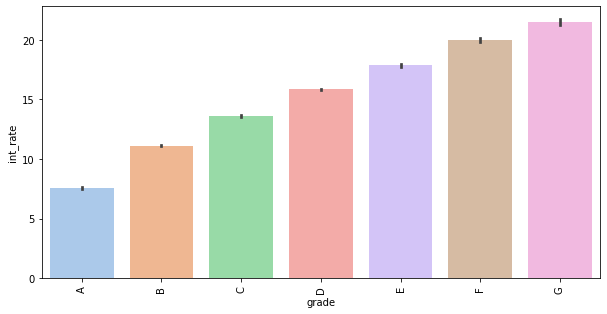

In [217]:
bivariate_plot('grade','int_rate',True)

### Inference:
As the interest rate increases, grade increases.

We have choosen funded_amnt_inv as y value because it represents the impact of risk. The risk impact is bascially the amount of money invested by the investors. And we are creating plots with x value as categorical variables.

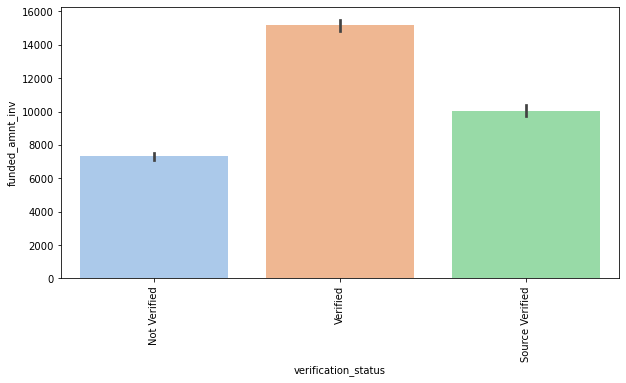

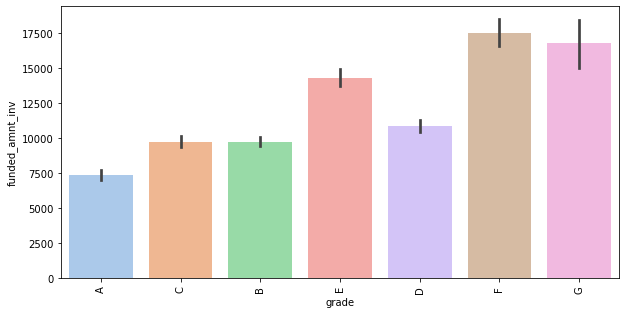

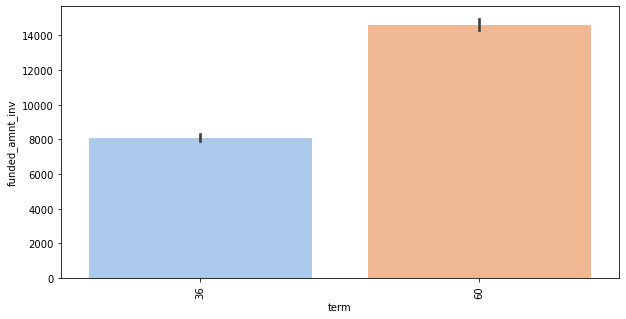

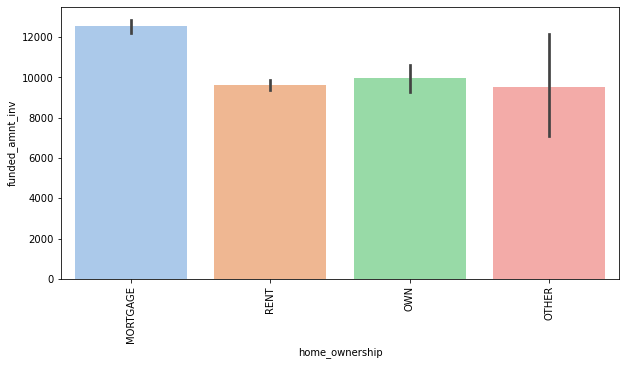

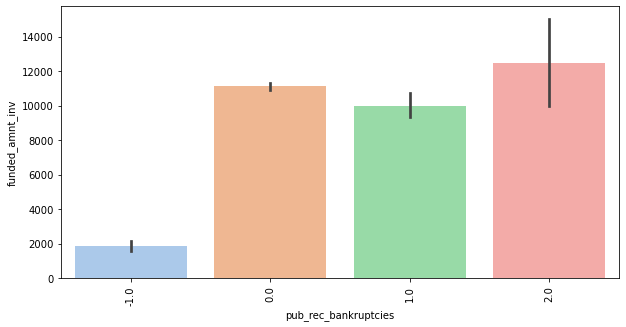

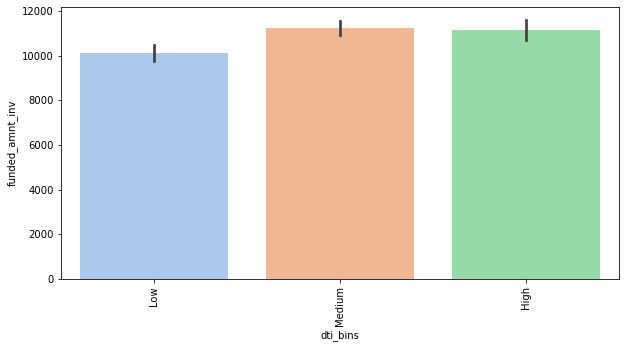

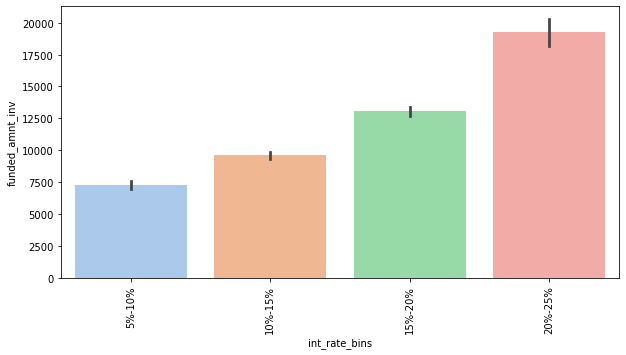

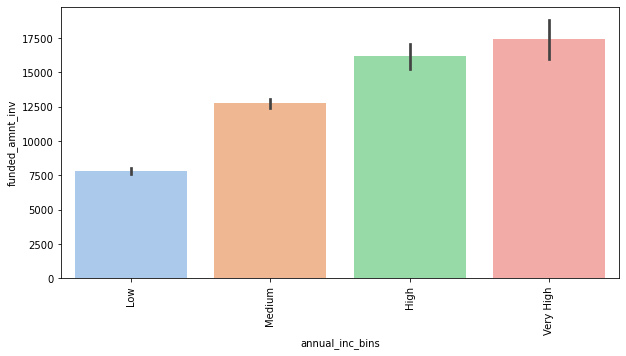

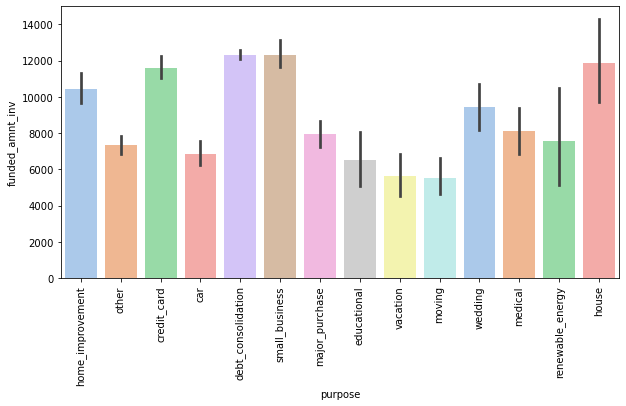

<Figure size 432x288 with 0 Axes>

In [218]:
col_names = ['verification_status','grade','term','home_ownership','pub_rec_bankruptcies','dti_bins','int_rate_bins','annual_inc_bins','purpose']

rows = len(col_names)
for idx,col in enumerate(col_names,start=1):
  bivariate_plot(col,'funded_amnt_inv',False)
plt.tight_layout()

### Inference:
categorical variables vs funded_amnt_inv
*   verification status
    * verified loans are funded high.
*   grade
    * There is positive correlation between grade and funded_amnt_inv.
*   term
    * funded_amnt_inv is high for 60 months term.
*   home_ownership
    * Mortgage and own are getting higher funded_amnt_inv
*   pub_rec_bankruptices
    * Even though there are public record bankruptices, investors are lending money to requestors.
*   dti
    * Investors are lending money for low and medium dti.
*   interest rate
    * As funded_amnt_inv increases, interest rate increases.
*   annual income
    * As annual income increases, funded amount by investors increases.



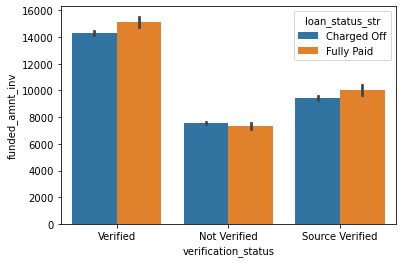

In [219]:
sns.barplot(x='verification_status', y='funded_amnt_inv', hue="loan_status_str", data=loan_df, estimator=np.mean)
plt.show()

### Inference:
Even though verification done for loans. we could see that there are defaulters mapping to the high invested amount.

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


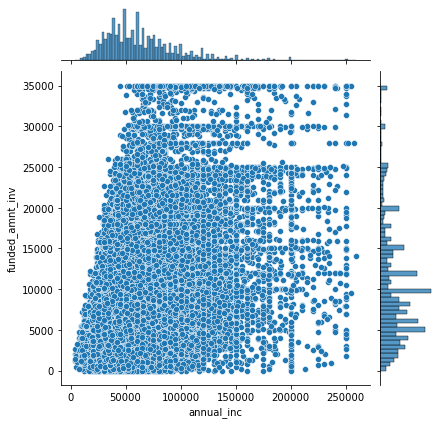

In [220]:
sns.jointplot('annual_inc', 'funded_amnt_inv', loan_df.loc[loan_df['annual_inc']<260000])
plt.show()

### Inference
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

## Correlation Analysis : Heat Map

<AxesSubplot:>

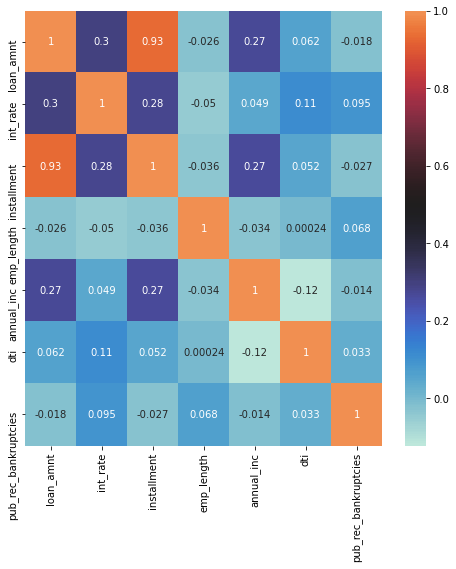

In [221]:
plt.figure(figsize=(8,8))
cont_var= ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc','dti', 'pub_rec_bankruptcies']
corr = loan_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

In [222]:
corr = loan_df.loc[(loan_df.loan_status== 1)][cont_var].corr()

<AxesSubplot:>

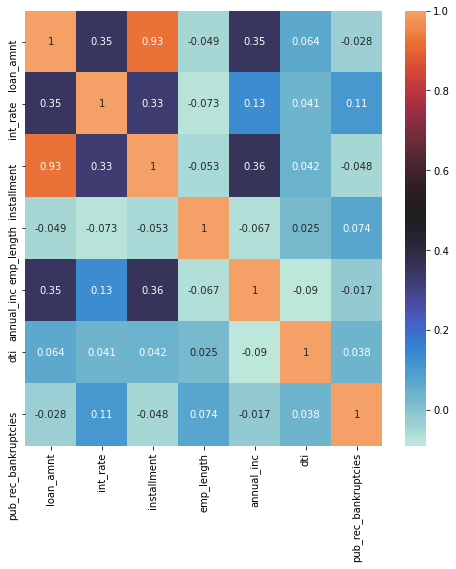

In [223]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, center=0.5)

Heat map created for Charged off data set


High correlation between
<li>Loan Amount & Interest Rate
<li>Loan Amount & Installment
<li>Loan Amount & Annual Income
<li>Interest Rate & Installments
<li>Installment & Annual Income

    
    
Negative correlation between
<li>Loan Amount & Employment Length
<li>Loan Amount & Public Bankruptcies
<li>Interest Rate & Employment Length
<li>Installment & Employment Length
<li>Annual Income & Employment Length
<li>Annual Income & DTI
